In [49]:
# examine ensemble covariances
# initial built: 2024/10/03

import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import pickle
from datetime import datetime, timedelta


In [2]:
datahome = '/scratch2/GFDL/gfdlscr/Mingjing.Tong/share/ENSFCST/s2022_C192_v2p5_edmf1ens0'

init_time  = datetime(2022, 6, 20, 0, 0, 0)  # Year, month, day, hour, minute, second
final_time = datetime(2022, 6, 20, 0, 0, 0)  # Year, month, day, hour, minute, second
dt         = 24 # in hours

In [40]:

T={}; HUM={}; CLW={}; U={}; V={};

ne=80

for i in range(ne):
    
    mem = f'mem{i+1:03}'
    
    current_time = init_time
    
    while current_time <= final_time:
        format_time  = current_time.strftime("%Y%m%d%H")
        yyyymmdd = format_time[0:8]
        hh       = format_time[8:10]
        
        ncfile       = f'{datahome}/enkfgdas.{yyyymmdd}/{hh}/atmos/{mem}/gdas.t00z.atmf006.nc'
        print(ncfile)

        fn = nc.Dataset(ncfile)        

        lon   = fn.variables['lon'][:]
        lat   = fn.variables['lat'][:]
        T3d   = fn.variables['tmp'][:]     # temperature
        HUM3d = fn.variables['spfh'][:]    # specific humidity
        CLW3d = fn.variables['clwmr'][:]   # cloud water mixing ratio
        U3d   = fn.variables['ugrd'][:]    # U-wind
        V3d   = fn.variables['vgrd'][:]    # V-wind
            
        fn.close()
        
        # zonal mean
        T[mem]   = np.mean(T3d, axis=3)
        HUM[mem] = np.mean(HUM3d, axis=3)
        CLW[mem] = np.mean(CLW3d, axis=3)
        U[mem]   = np.mean(U3d, axis=3)
        V[mem]   = np.mean(V3d, axis=3)

        # progress to the next time step
        current_time = current_time + timedelta(hours=dt)


/scratch2/GFDL/gfdlscr/Mingjing.Tong/share/ENSFCST/s2022_C192_v2p5_edmf1ens0/enkfgdas.20220620/00/atmos/mem001/gdas.t00z.atmf006.nc
/scratch2/GFDL/gfdlscr/Mingjing.Tong/share/ENSFCST/s2022_C192_v2p5_edmf1ens0/enkfgdas.20220620/00/atmos/mem002/gdas.t00z.atmf006.nc
/scratch2/GFDL/gfdlscr/Mingjing.Tong/share/ENSFCST/s2022_C192_v2p5_edmf1ens0/enkfgdas.20220620/00/atmos/mem003/gdas.t00z.atmf006.nc
/scratch2/GFDL/gfdlscr/Mingjing.Tong/share/ENSFCST/s2022_C192_v2p5_edmf1ens0/enkfgdas.20220620/00/atmos/mem004/gdas.t00z.atmf006.nc
/scratch2/GFDL/gfdlscr/Mingjing.Tong/share/ENSFCST/s2022_C192_v2p5_edmf1ens0/enkfgdas.20220620/00/atmos/mem005/gdas.t00z.atmf006.nc
/scratch2/GFDL/gfdlscr/Mingjing.Tong/share/ENSFCST/s2022_C192_v2p5_edmf1ens0/enkfgdas.20220620/00/atmos/mem006/gdas.t00z.atmf006.nc
/scratch2/GFDL/gfdlscr/Mingjing.Tong/share/ENSFCST/s2022_C192_v2p5_edmf1ens0/enkfgdas.20220620/00/atmos/mem007/gdas.t00z.atmf006.nc
/scratch2/GFDL/gfdlscr/Mingjing.Tong/share/ENSFCST/s2022_C192_v2p5_edmf1ens0

In [41]:
pfull = np.array([ 0.6608309, 1.378903, 2.252838, 3.225348, 4.255341, \
                    5.330372, 6.456353, 7.655193, 8.959935, 10.41395, \
                    12.05274, 13.89211, 15.94824, 18.23763, 20.77700, \
                    23.58316, 26.67296, 30.06311, 33.77012, 37.81014, \
                    42.19892, 46.95163, 52.08276, 57.60604, 63.53439, \
                    69.87972, 76.65289, 83.86366, 91.52061, 99.63107, \
                    108.2011, 117.2354, 126.7373, 136.7088, 147.1505, \
                    158.0616, 169.4399, 181.2818, 193.5825, 206.3358, \
                    219.5342, 233.1691, 247.2307, 261.7080, 276.5892, \
                    291.8613, 307.5107, 323.5227, 339.8820, 356.5724, \
                    373.5775, 390.8800, 408.4624, 426.3068, 444.3951, \
                    462.7087, 481.2289, 499.9370, 518.8147, 537.8431, \
                    557.0037, 576.2781, 595.6483, 615.0961, 634.6042, \
                    654.1553, 673.6653, 693.0355, 712.2211, 731.1763, \
                    749.8550, 768.2110, 786.1975, 803.7682, 820.8767, \
                    837.4772, 853.5246, 868.9745, 883.7838, 897.9103, \
                    911.3136, 923.9548, 935.7968, 946.8046, 956.9453, \
                    966.1885, 974.5061, 981.8727, 988.2660, 993.6661, \
                    998.0573]) ;

In [42]:
# concatenate into numpy matrix:
_, nz, ny = T['mem001'].shape

Tens   = np.zeros((ne, nz, ny))
HUMens = np.zeros((ne, nz, ny))
CLWens = np.zeros((ne, nz, ny))
Uens   = np.zeros((ne, nz, ny))
Vens   = np.zeros((ne, nz, ny))

for i in range(ne):
    
    mem = f'mem{i+1:03}'
    Tens[i,:,:]   = T[mem]
    HUMens[i,:,:] = HUM[mem]
    CLWens[i,:,:] = CLW[mem]
    Uens[i,:,:]   = U[mem]
    Vens[i,:,:]   = V[mem]

In [ ]:
# save the zonal averaged ensemble data:
save_data = {'Tens':Tens, 'HUMens':HUMens, 'CLWens':CLWens, 'Uens':Uens, 'Vens':Vens}

output_fn = f''

with open('arrays.pkl', 'wb') as file:
    pickle.dump(data, file)

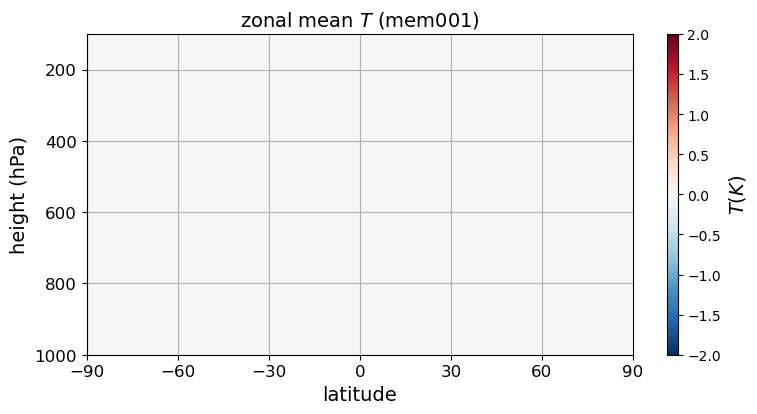

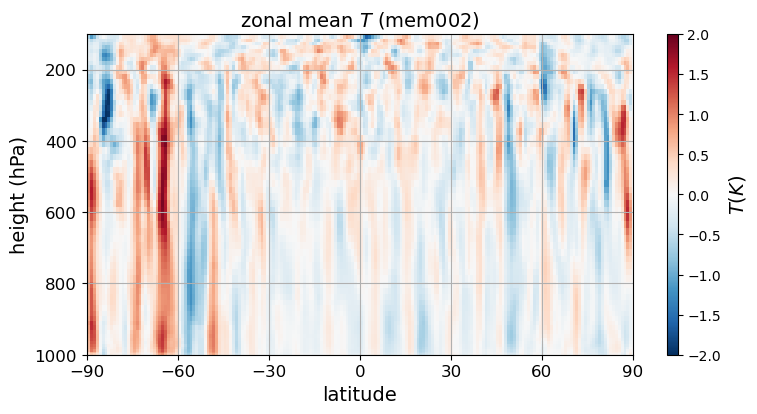

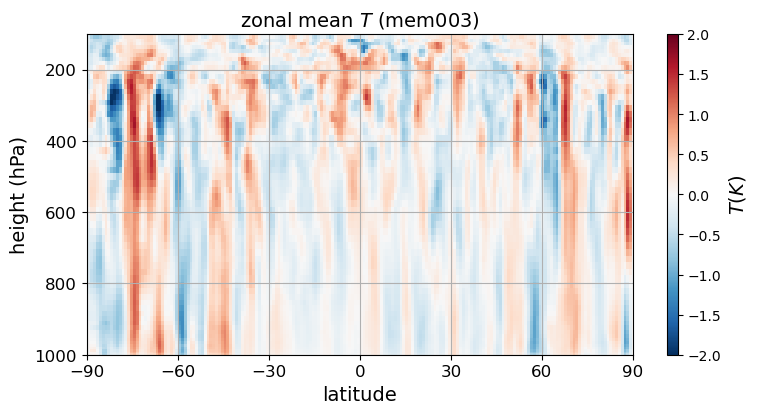

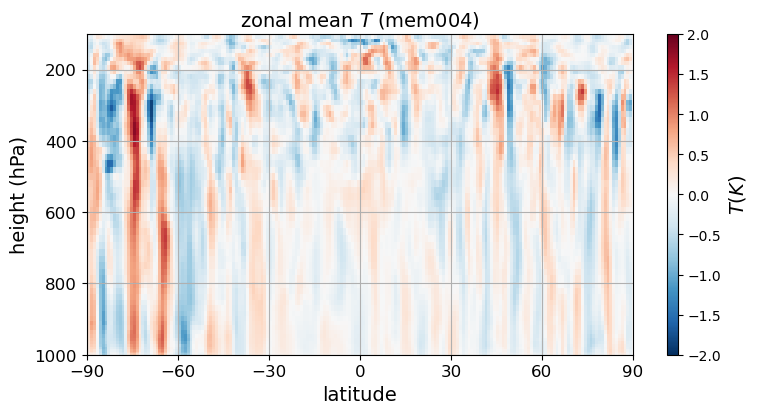

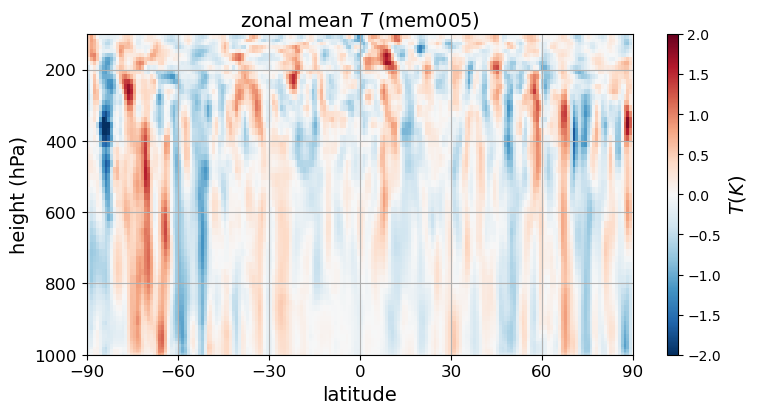

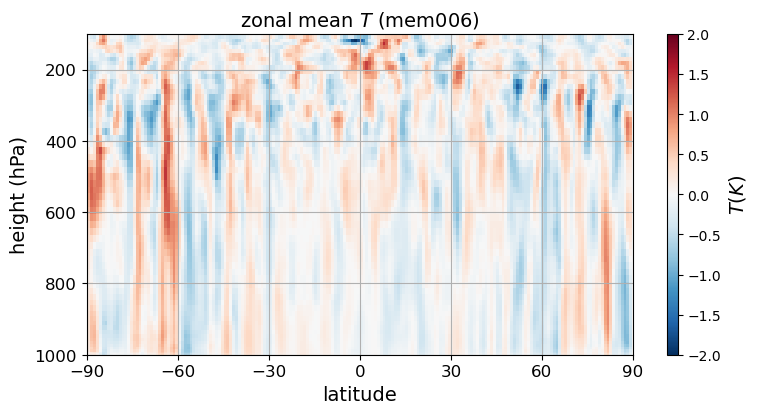

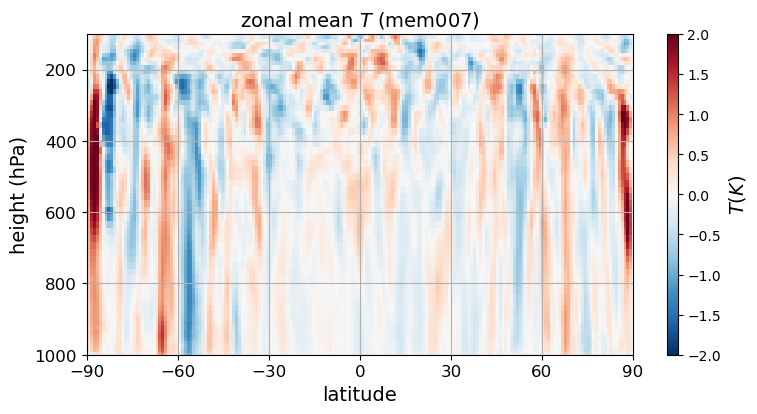

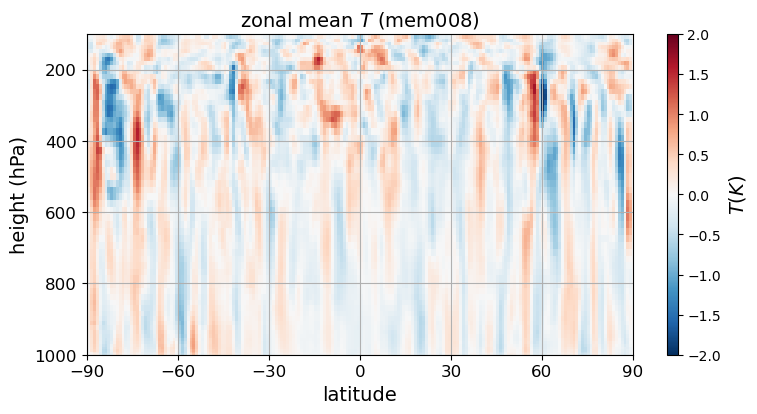

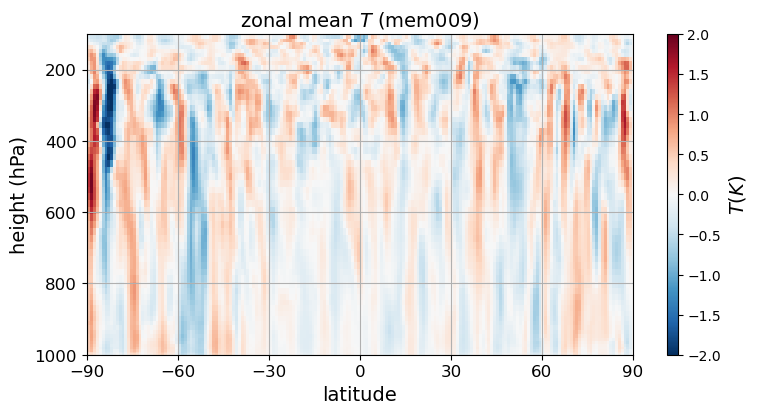

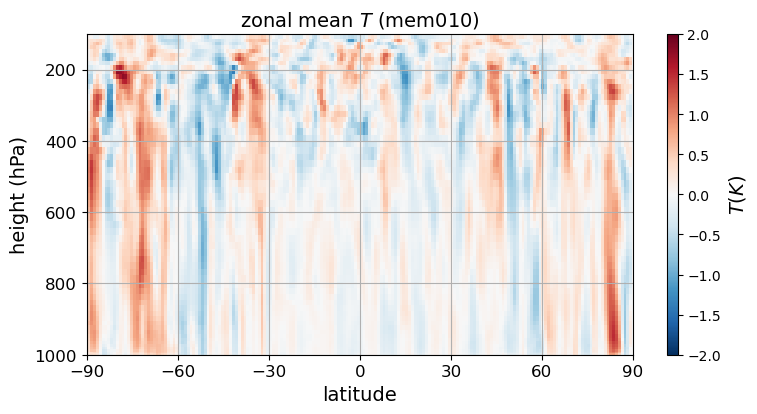

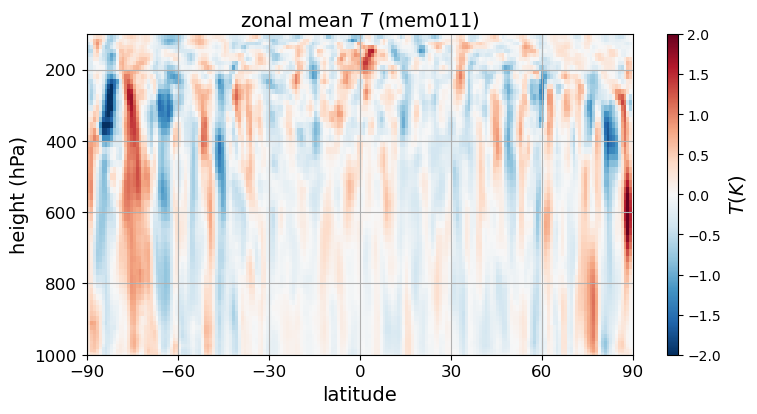

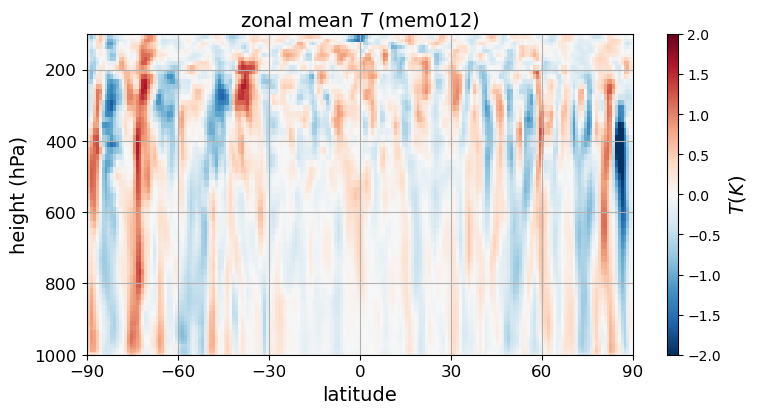

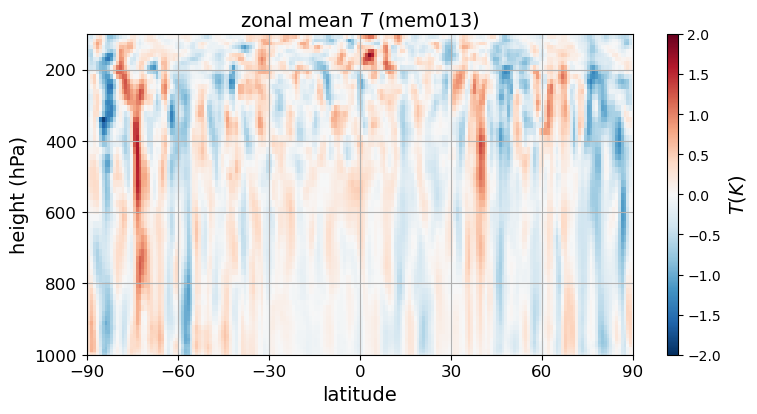

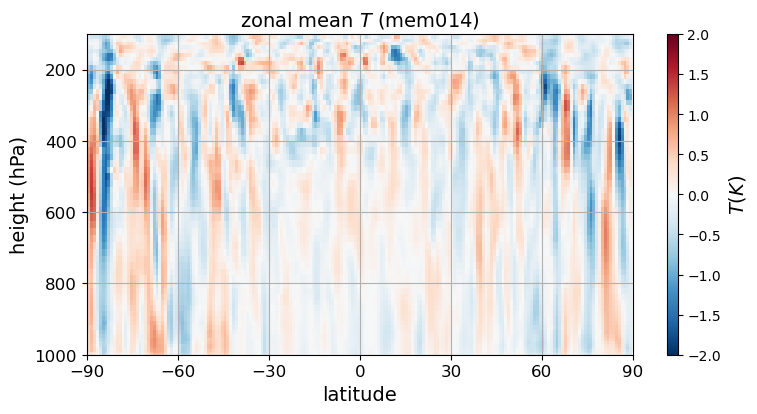

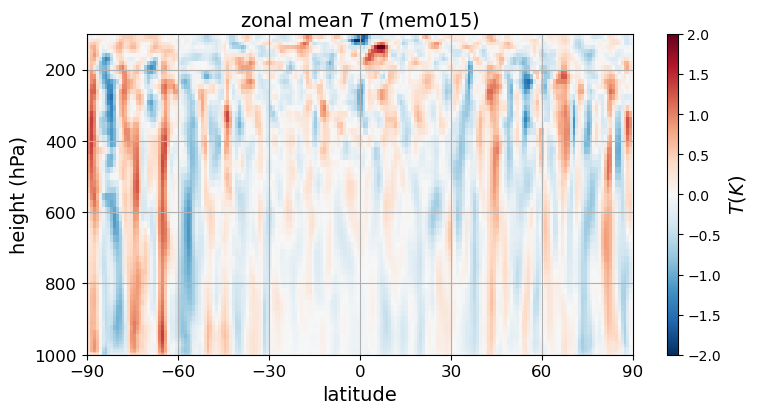

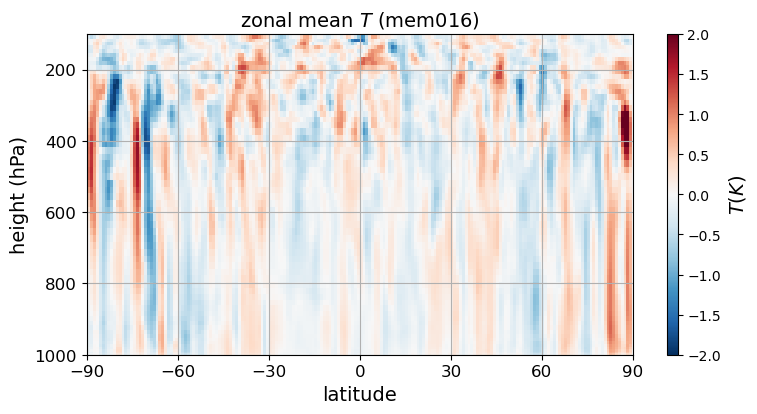

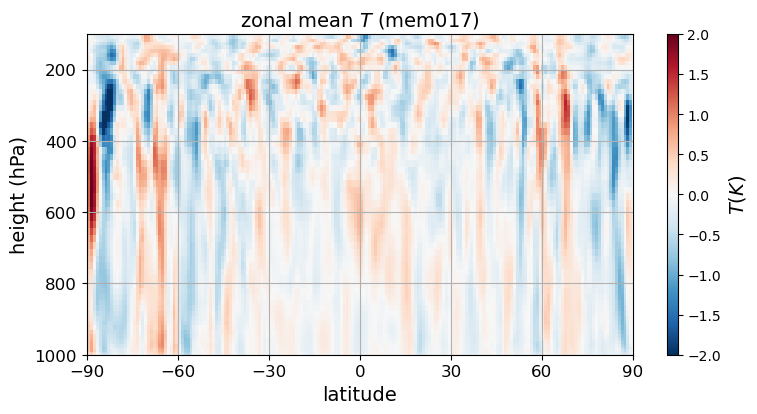

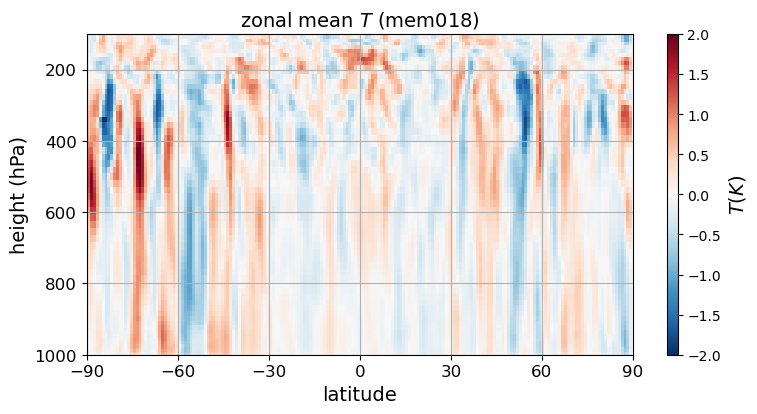

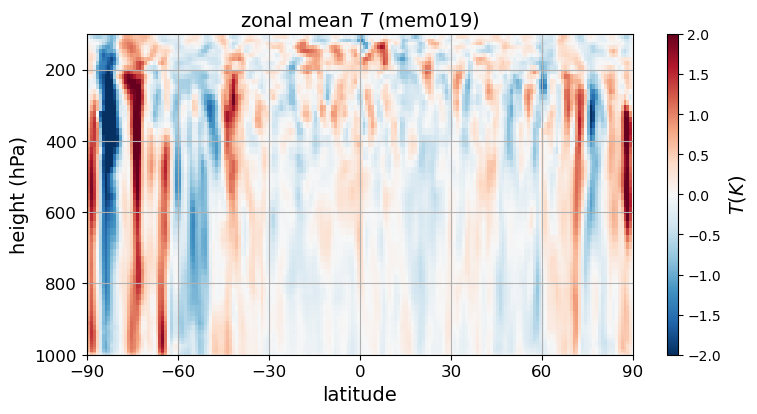

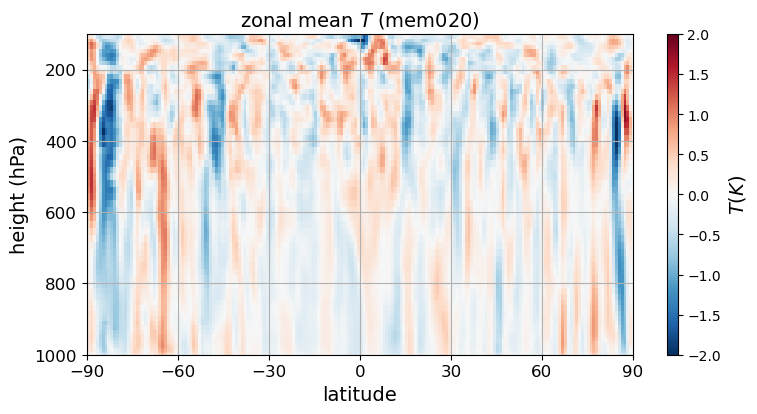

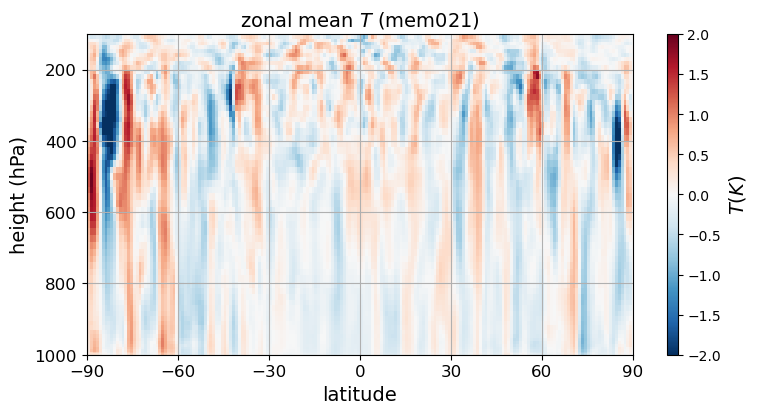

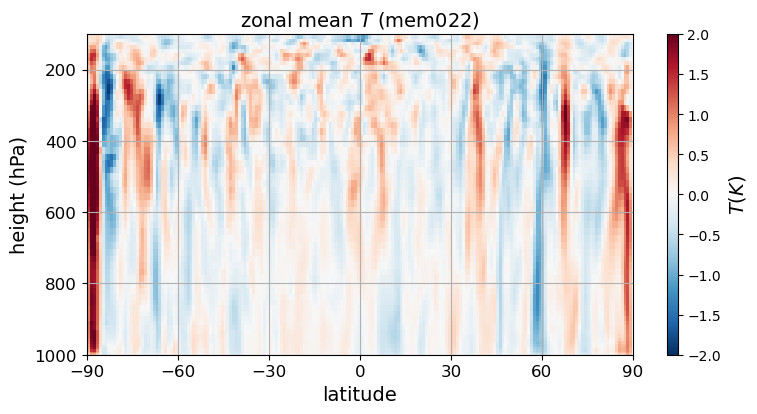

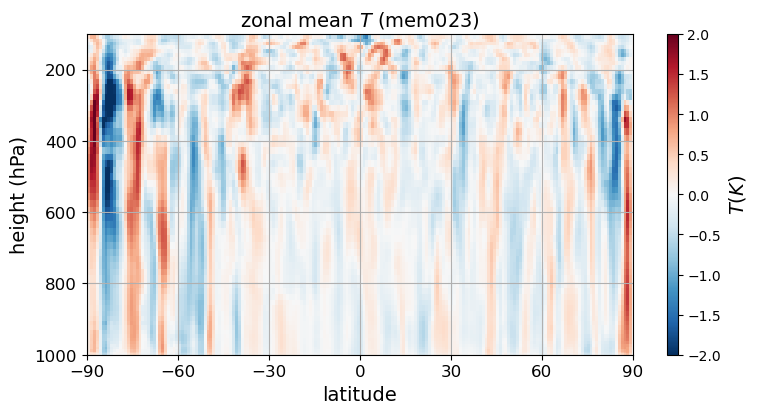

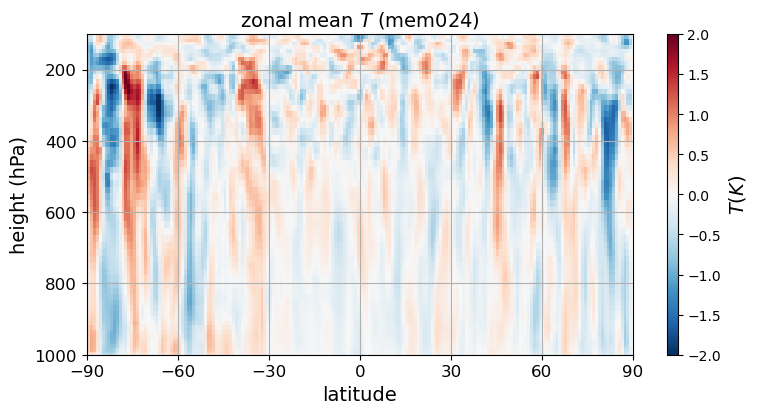

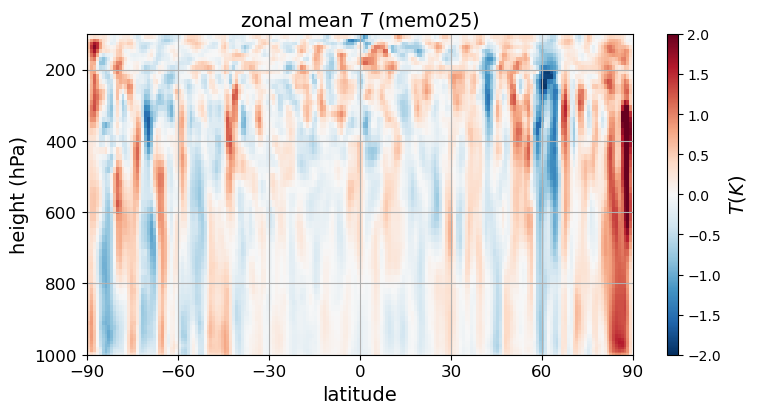

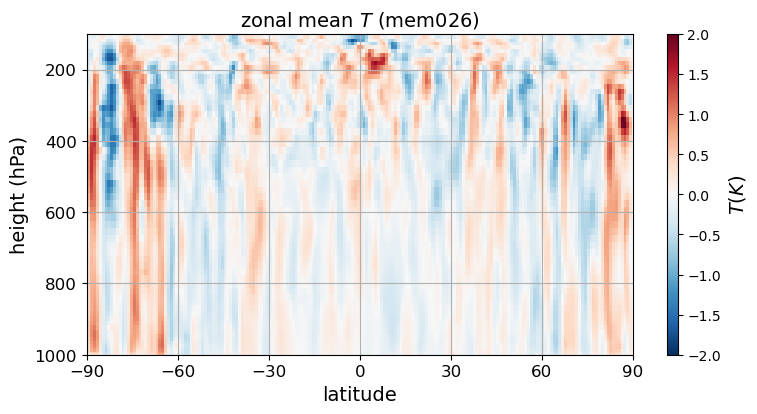

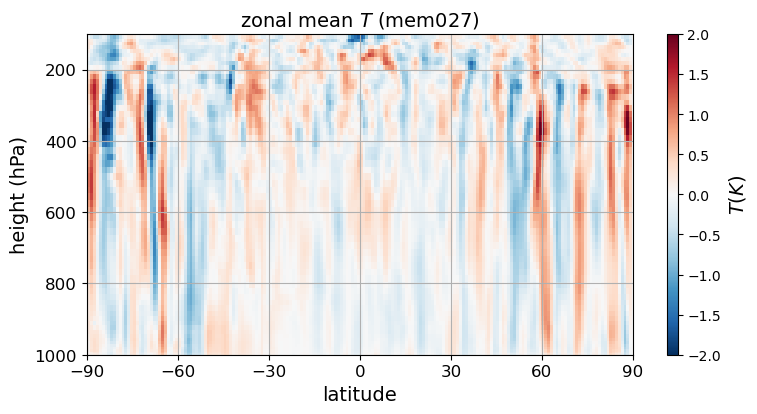

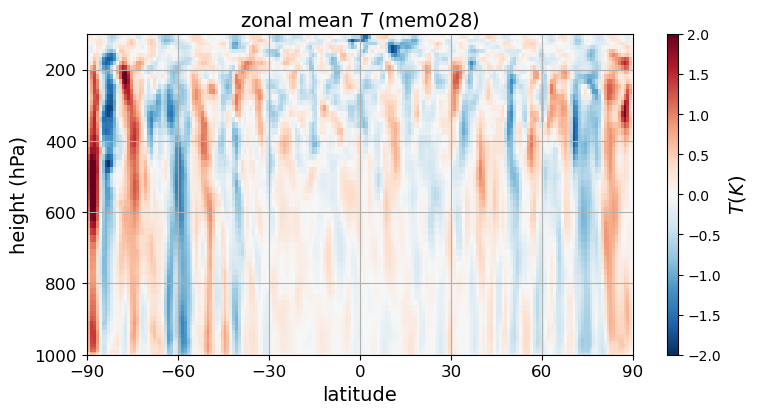

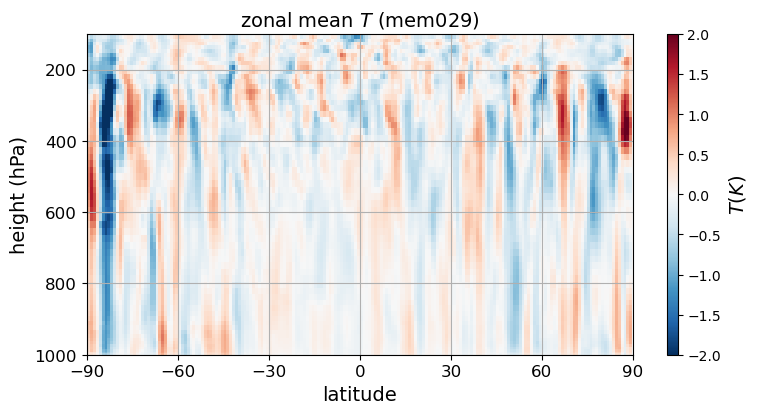

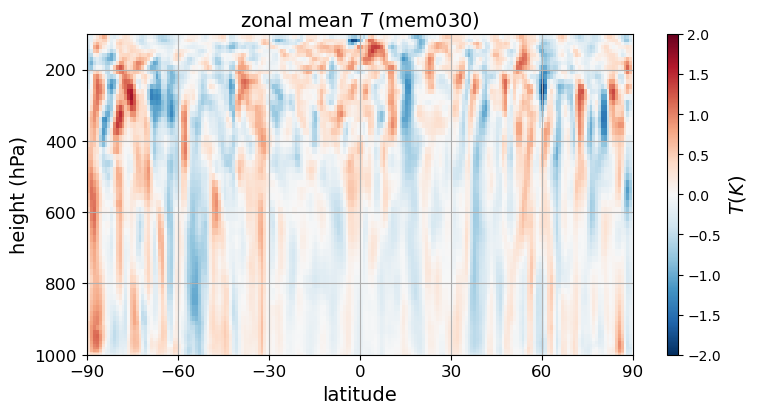

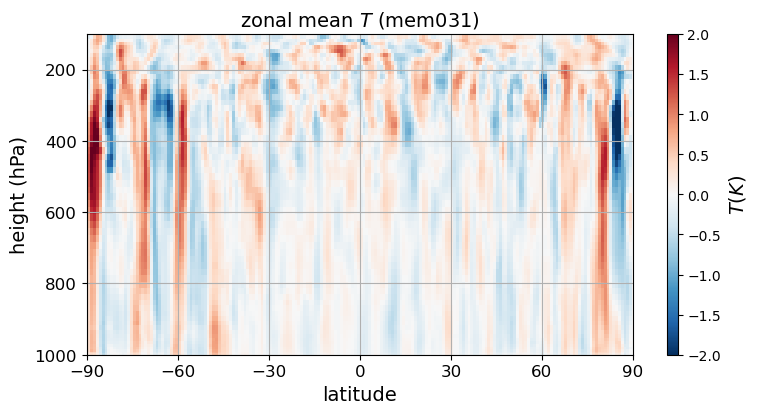

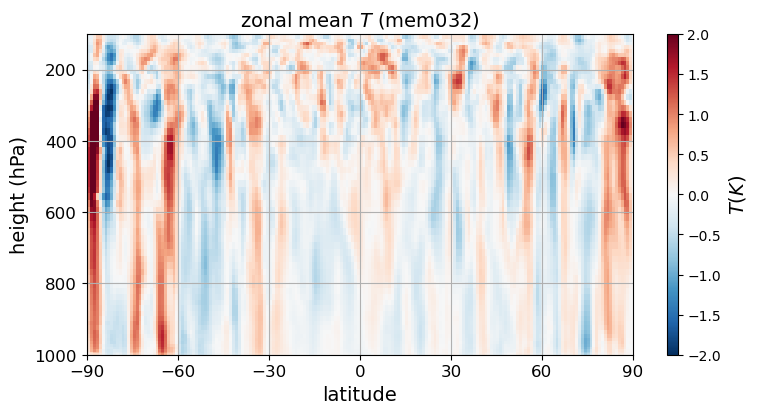

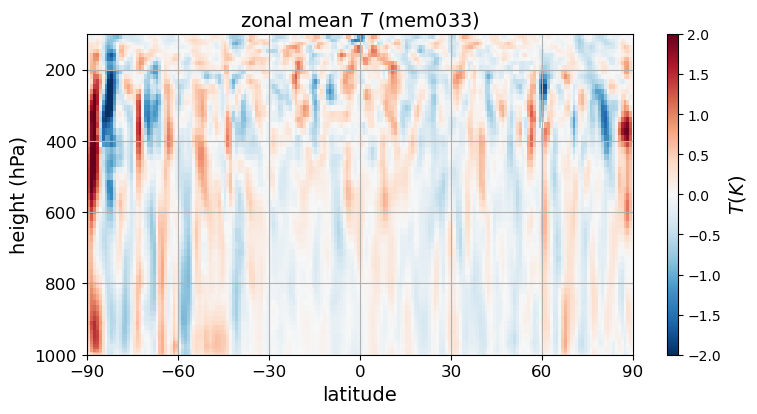

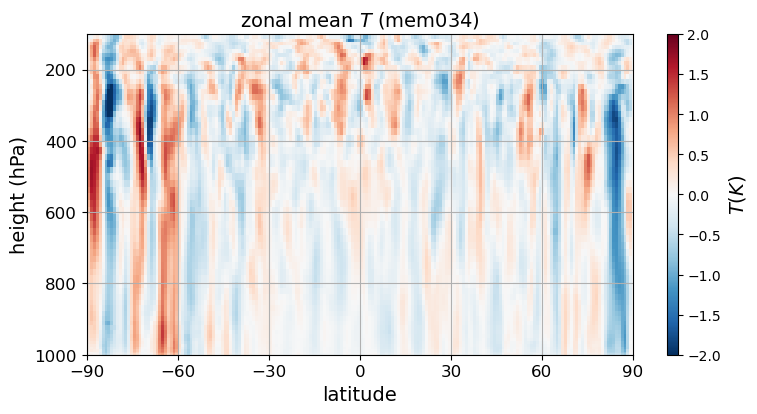

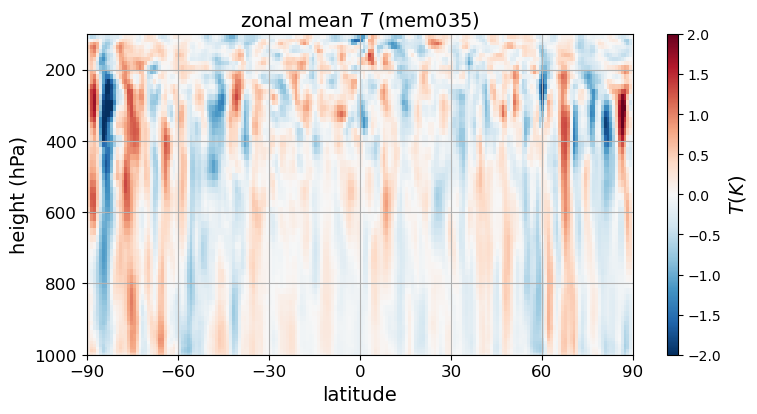

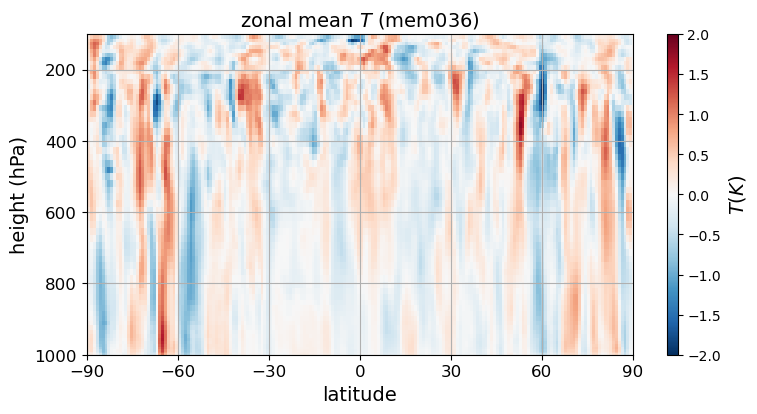

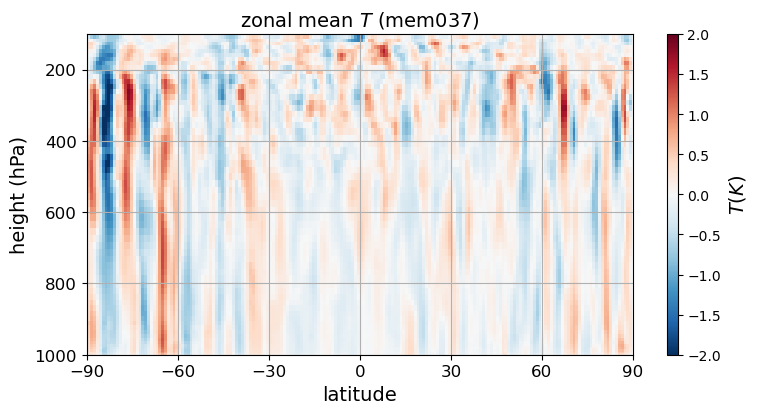

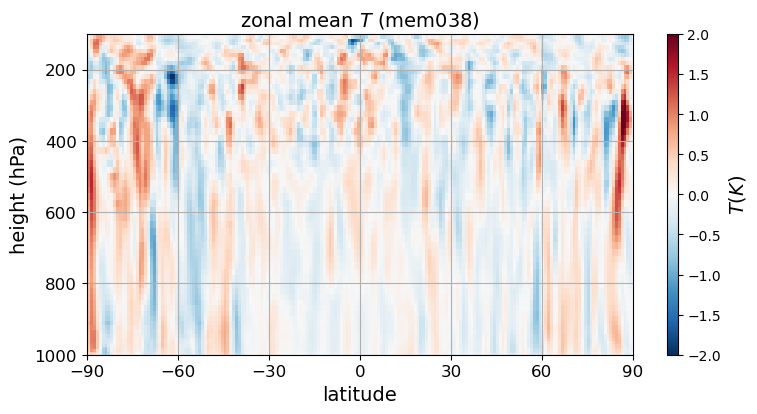

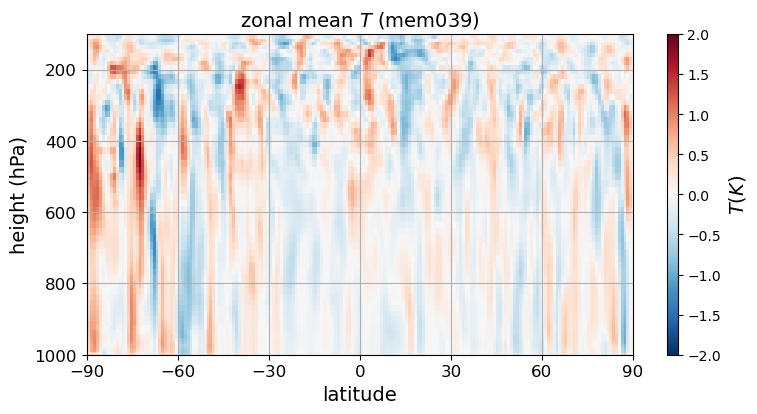

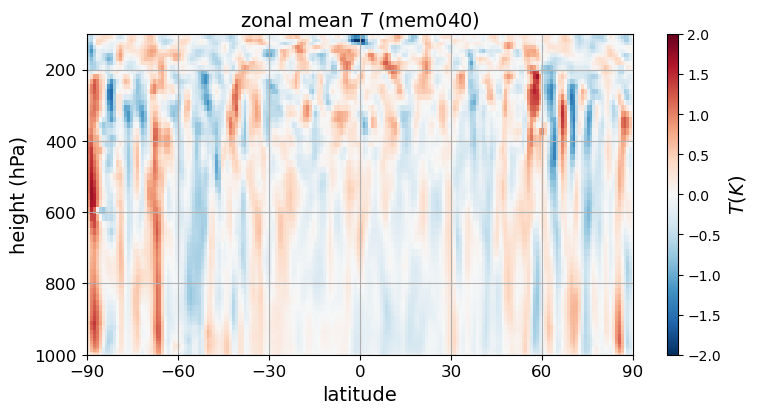

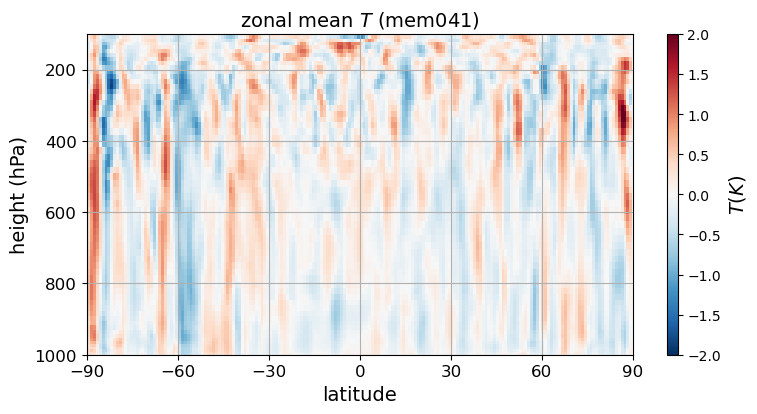

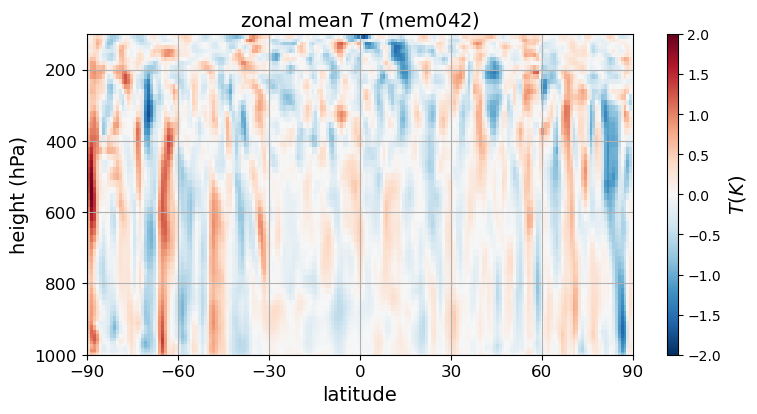

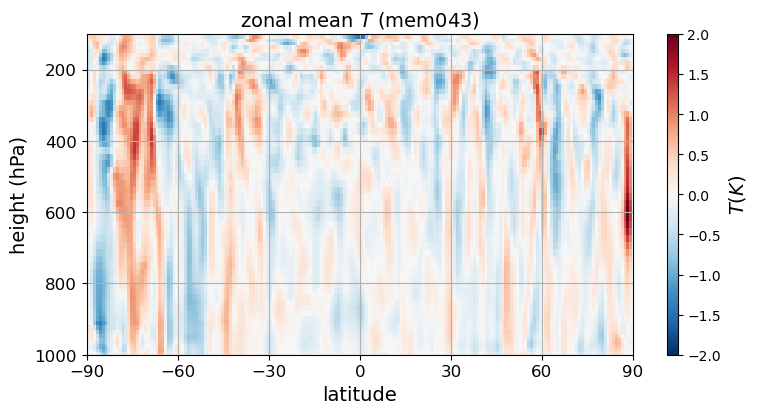

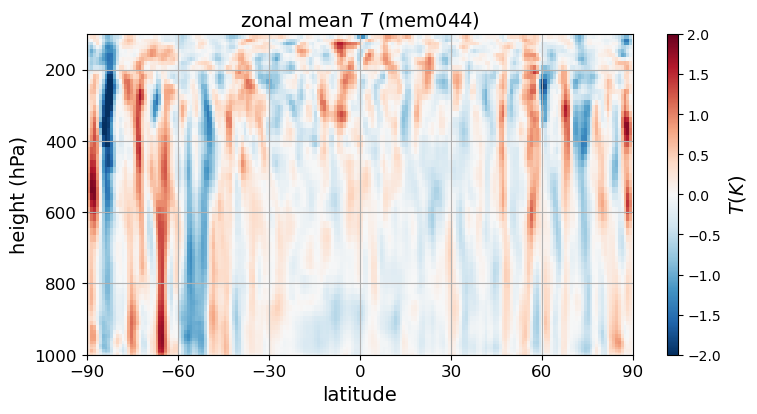

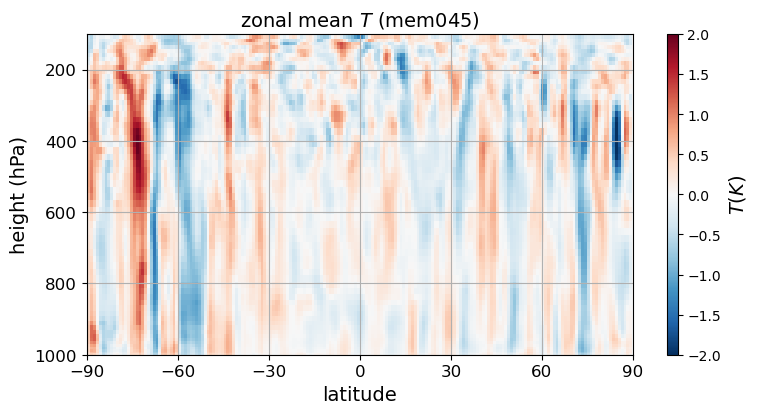

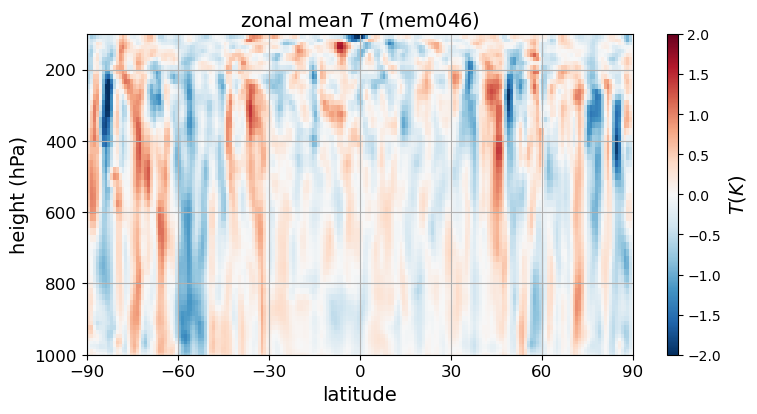

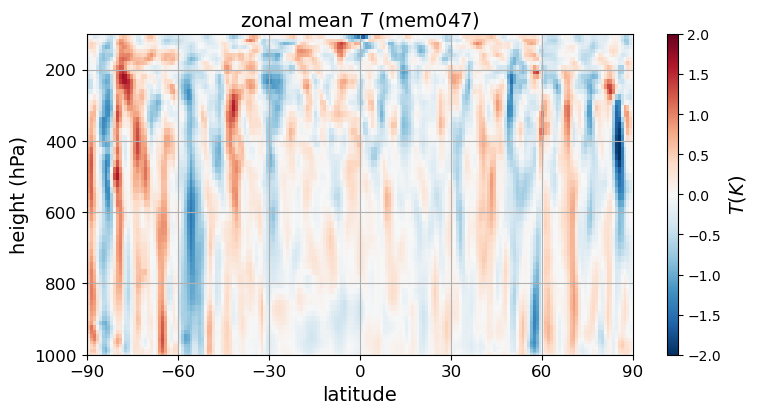

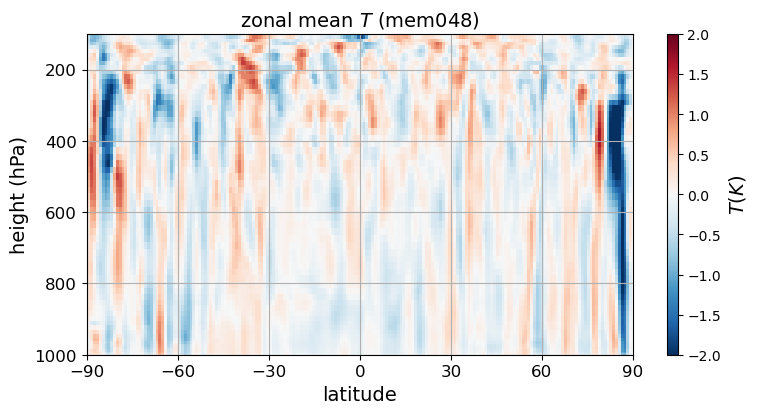

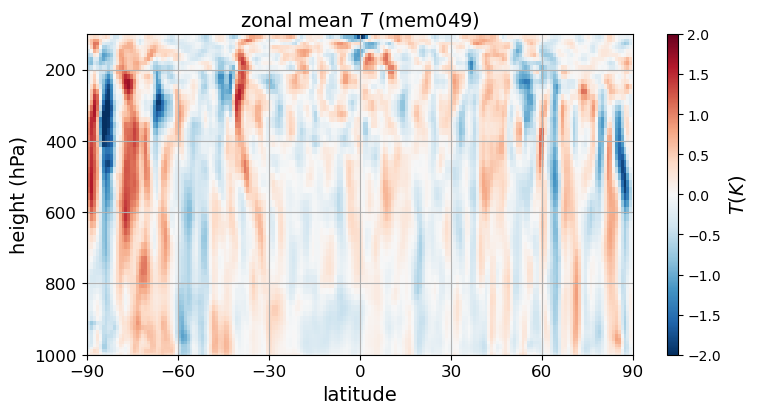

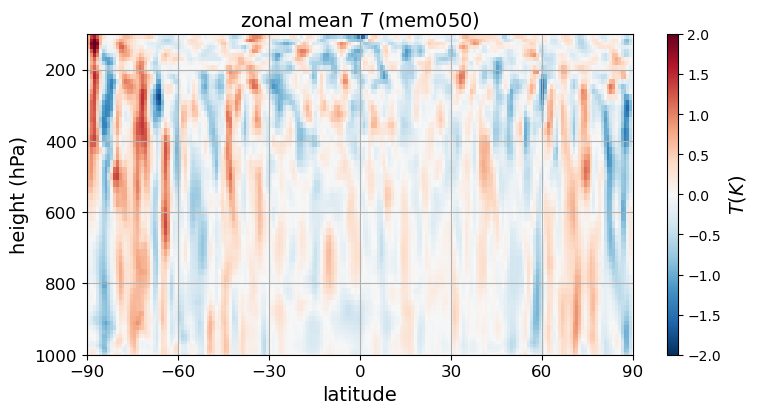

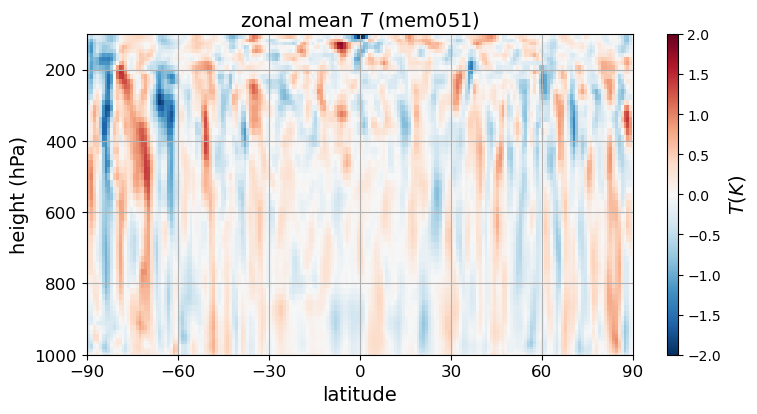

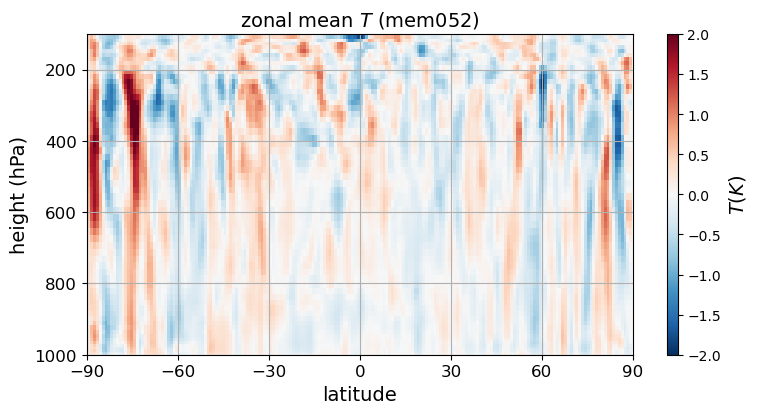

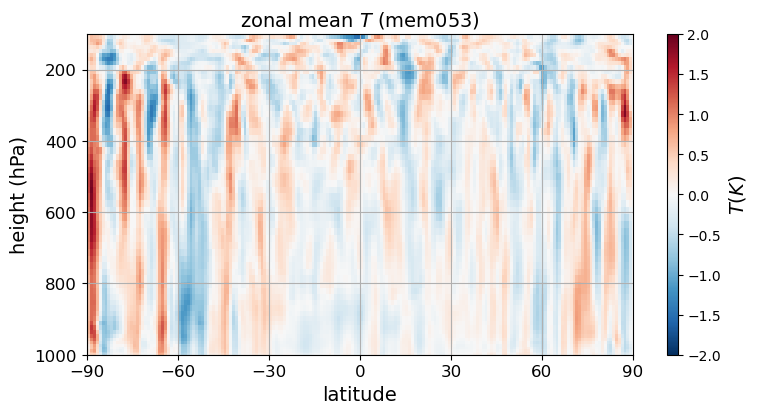

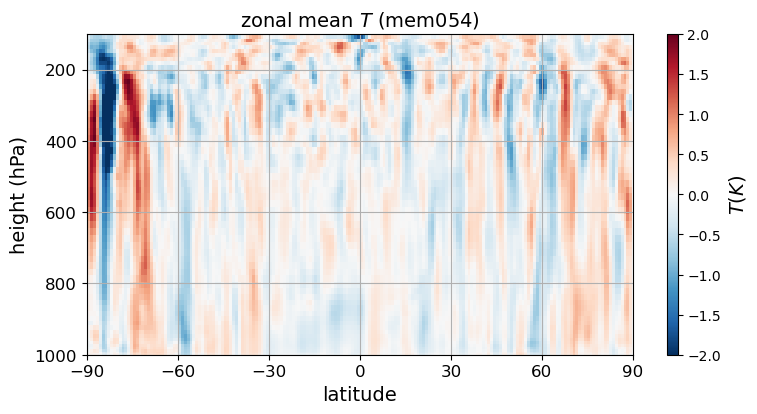

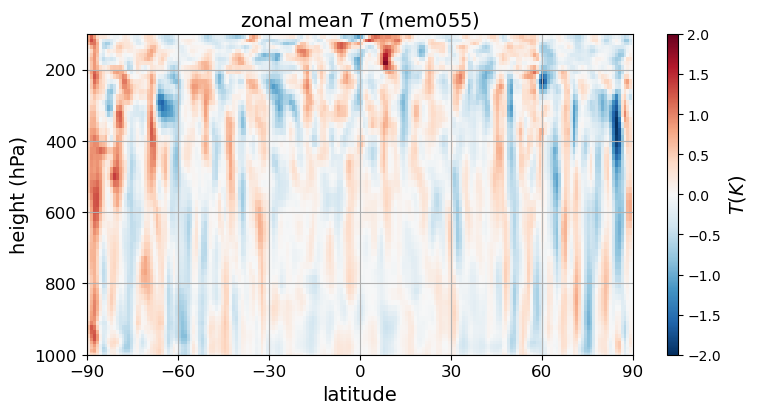

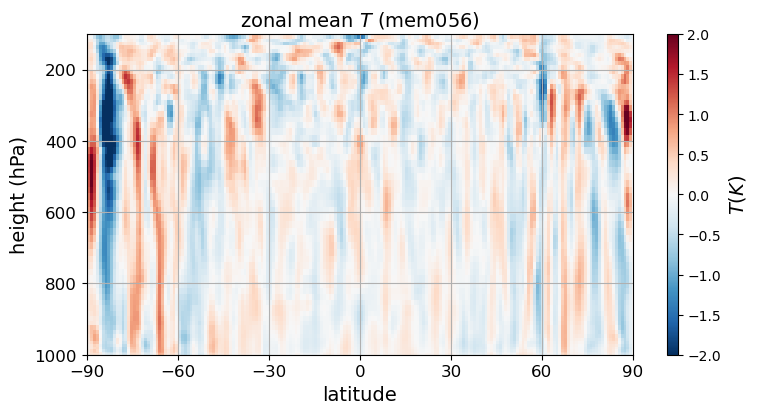

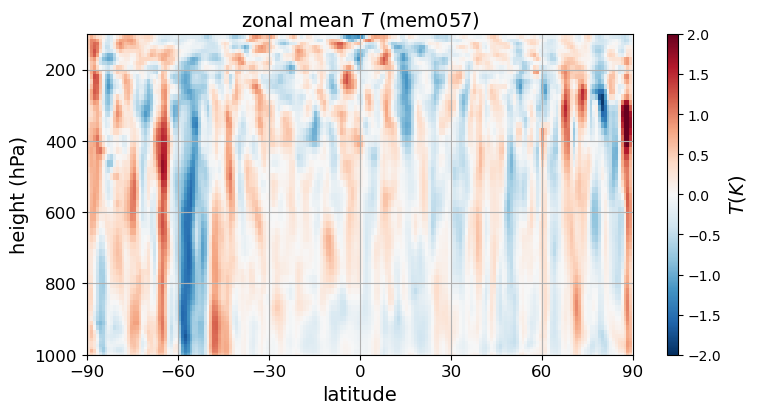

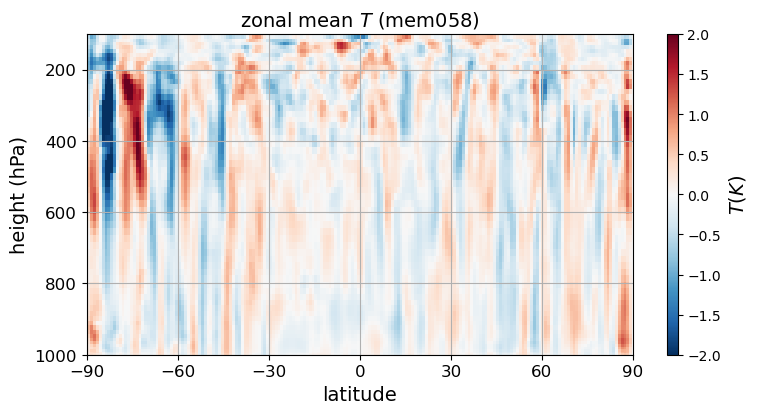

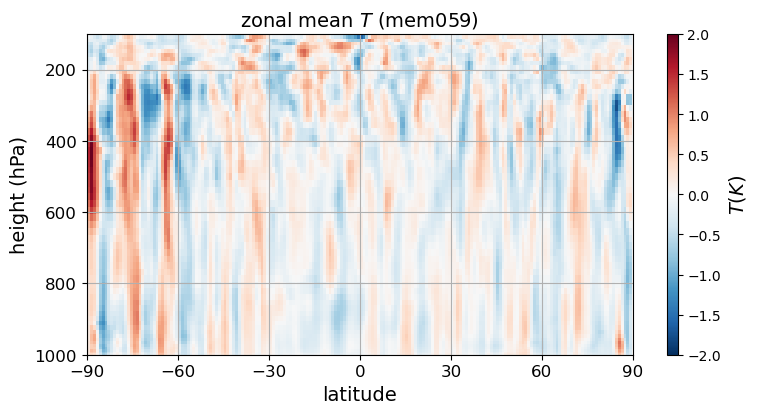

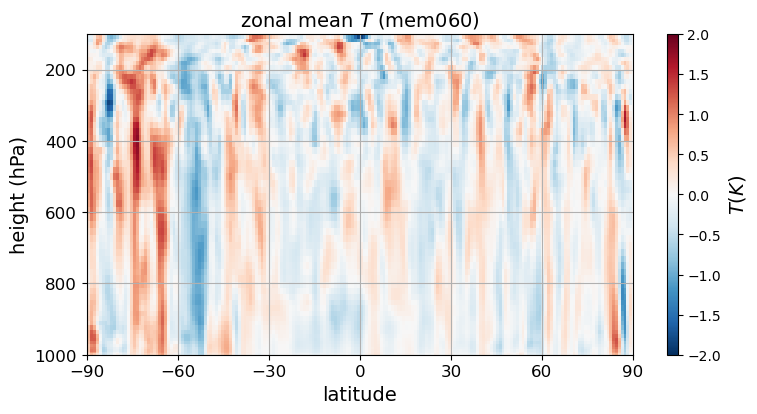

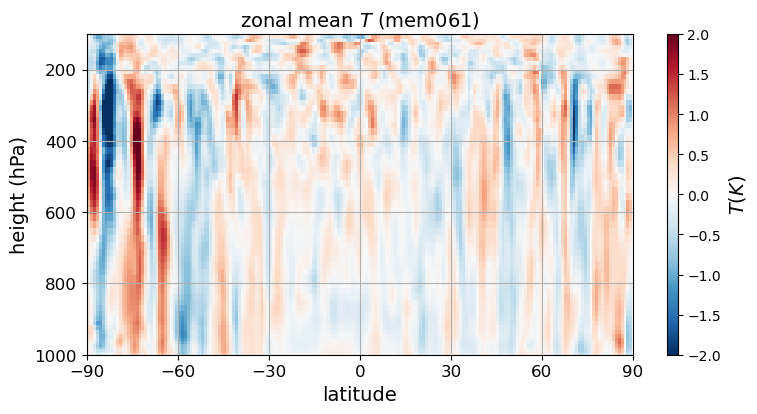

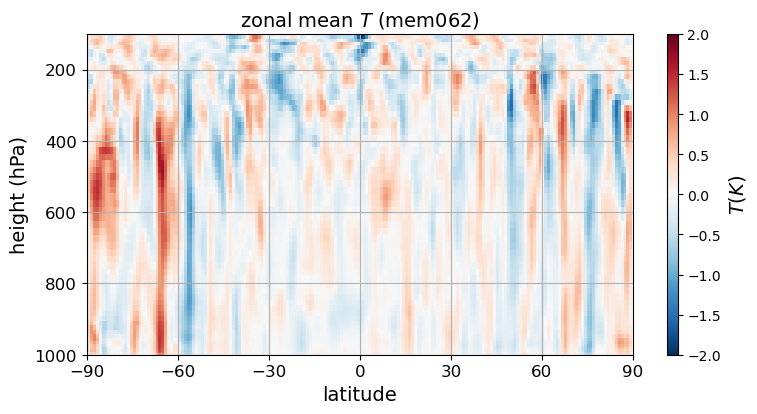

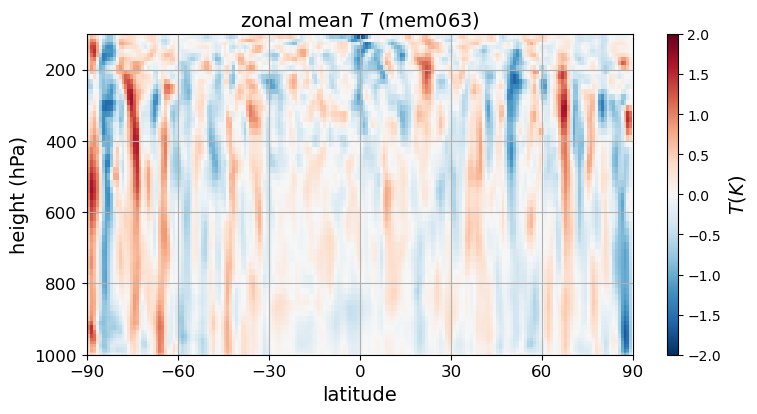

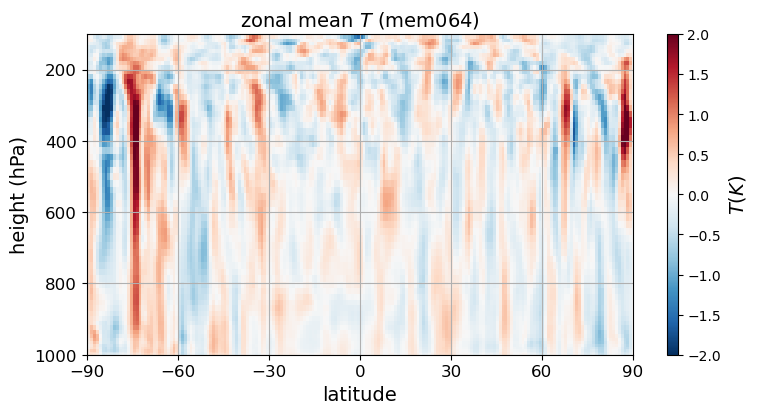

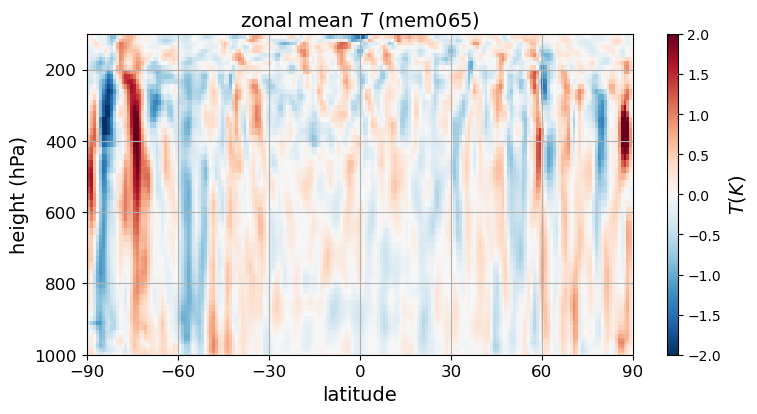

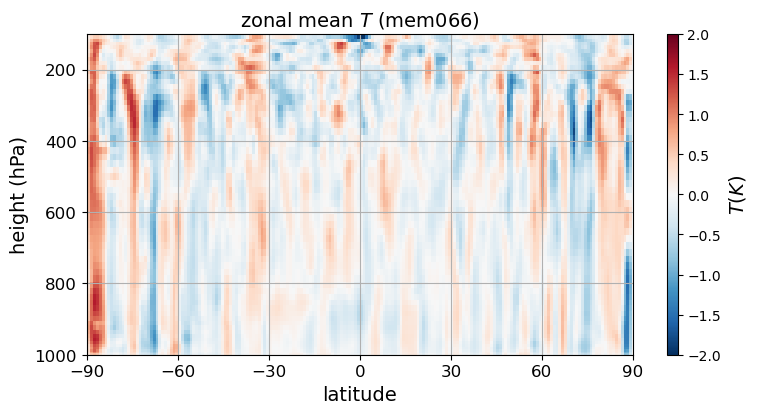

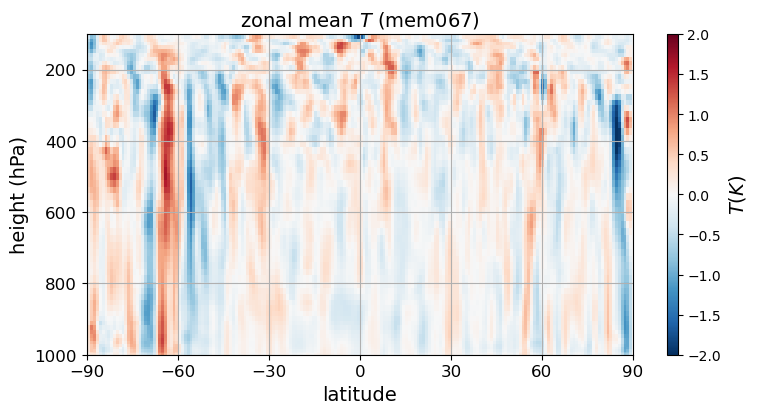

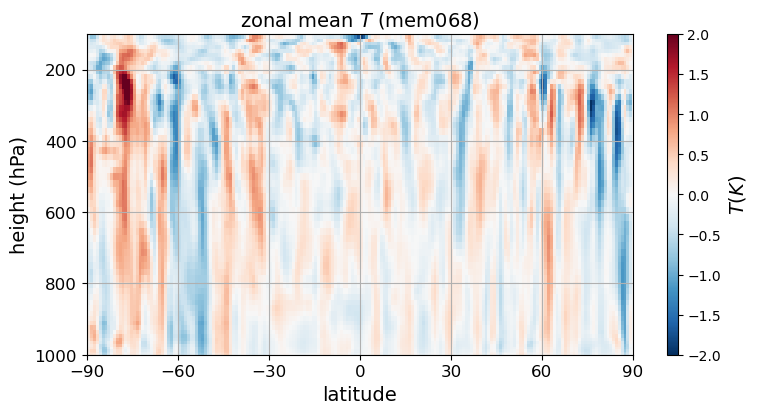

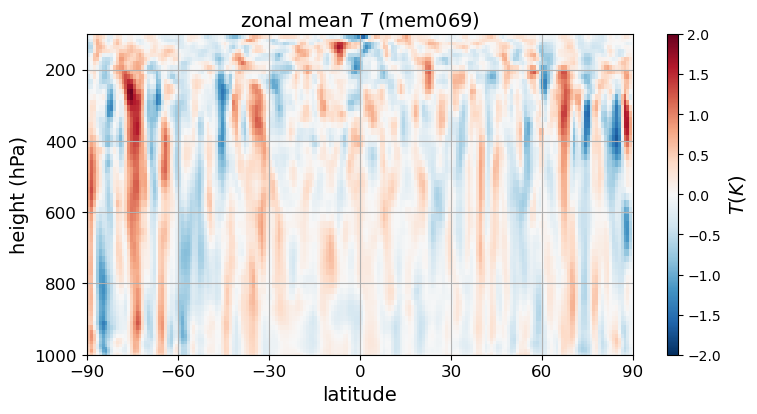

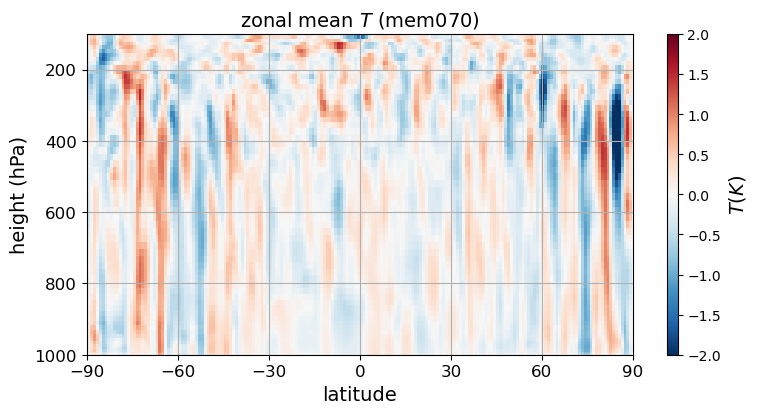

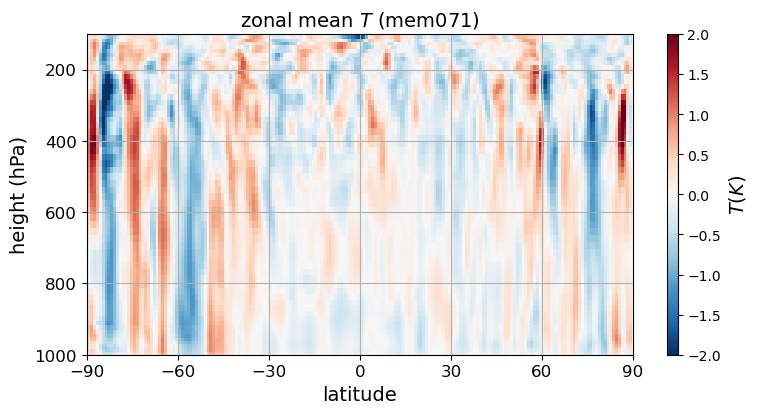

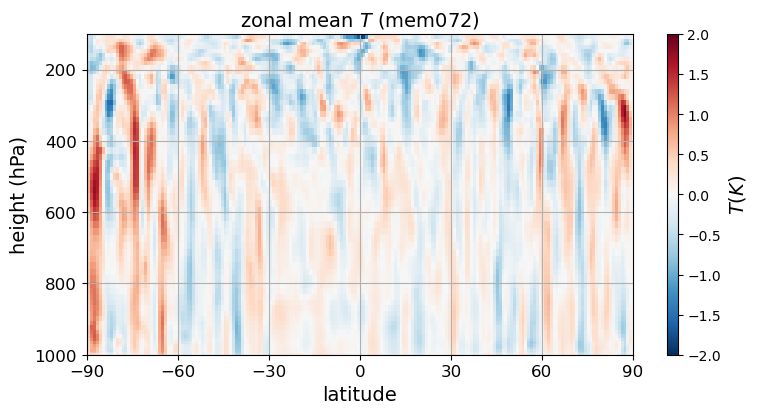

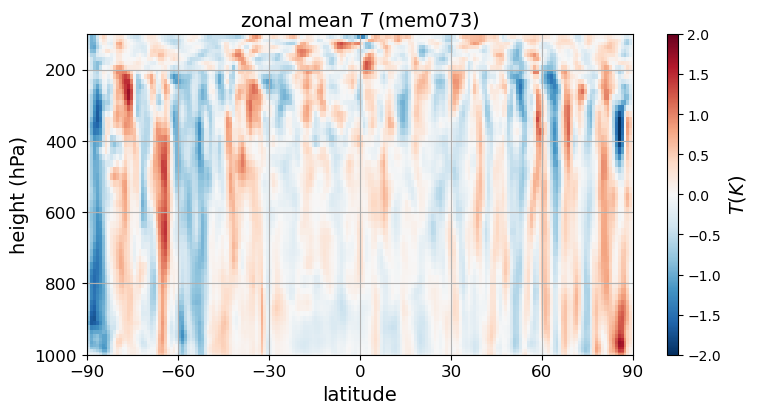

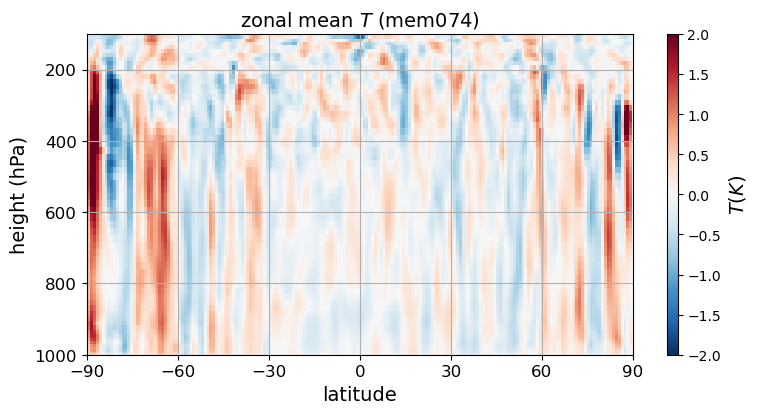

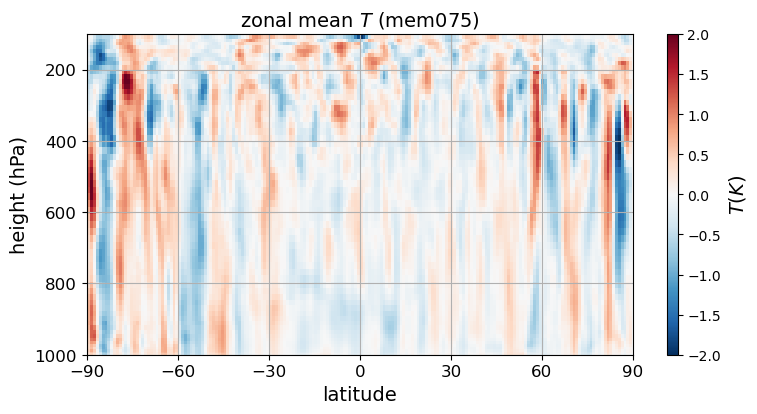

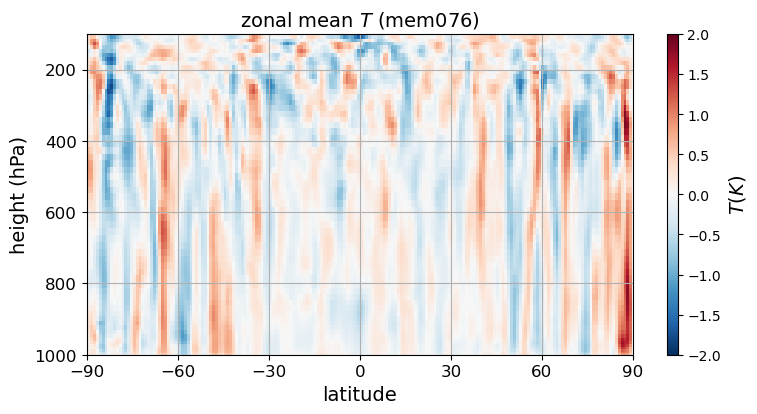

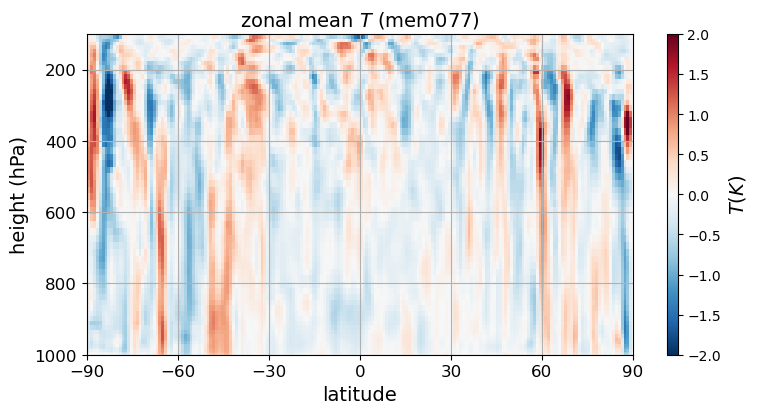

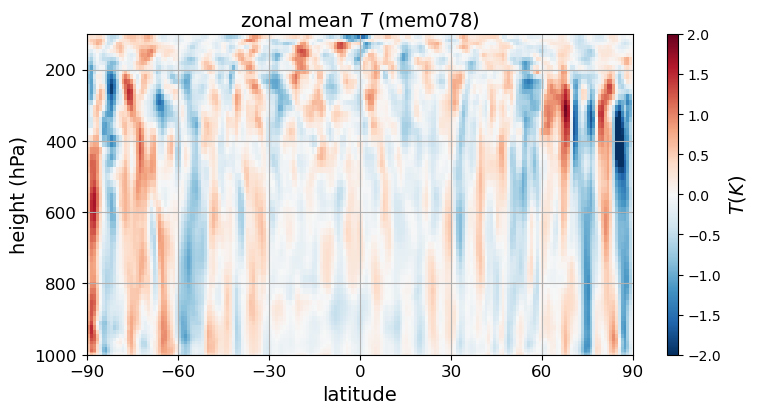

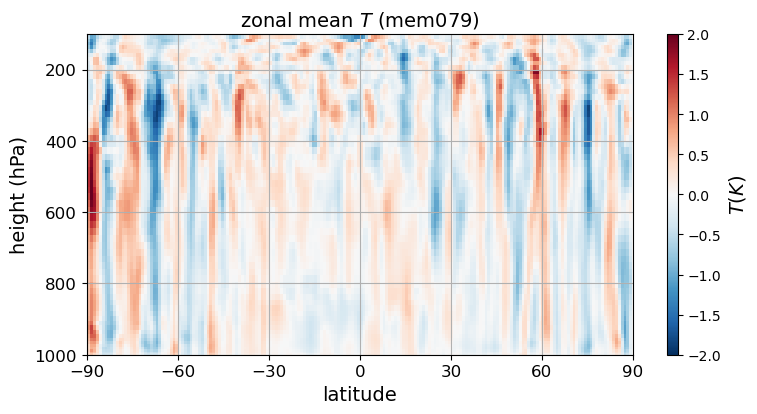

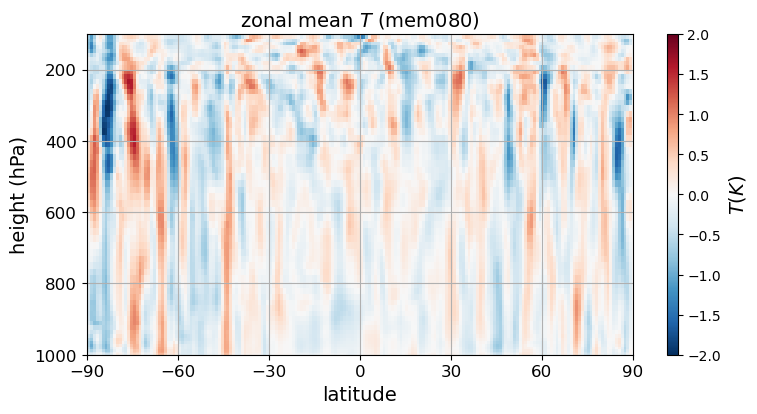

In [48]:
# look at the zonal mean from ensemble:

vmin =  -2
vmax =   2

lats, levs = np.meshgrid(np.mean(lat,axis=1), pfull)

for i in range(ne):
    fig, ax = plt.subplots(figsize=(8,4))
    contour1=ax.pcolormesh(lats, levs, Uens[i,:,:]-Uens[0,:,:], cmap='RdBu_r', vmin=vmin, vmax=vmax)
    ax.set_ylim(1000,100)
    ax.set_xlabel('latitude',fontsize=14)
    ax.set_xticks([-90,-60,-30,0,30,60,90])
    ax.set_ylabel('height (hPa)',fontsize=14)
    ax.set_yticks([1000,800,600,400,200])
    ax.tick_params(axis='x', labelsize=12)  # Set the size to 14 points
    ax.tick_params(axis='y', labelsize=12)  # Set the size to 14 points
    ax.grid(True)
    plt.tight_layout()

    cbar = fig.colorbar(contour1,location='right',aspect=30)
    #cbar.set_ticks([-6,-4,-2,0,2,4,6])  # Set the tick positions
    #cbar.set_ticklabels(['Low', 'Medium', 'Medium-High', 'High', 'Very High'])  # Set the tick labels

    cbar.set_label('$ T (K)$', fontsize=14)
    ax.set_title(f'zonal mean $ T$ (mem{i+1:03})',fontsize=14)
    plt.show()
    #plt.savefig(f'T_inc_monthly_avg_{exp}.png', dpi=200, bbox_inches='tight')

In [30]:
lats.shape

(91, 73728)